<a href="https://colab.research.google.com/github/Poojasri37/heart-attack-analysis-and-prediction/blob/main/heart_attack_analysis_and_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import pandas as pd
import numpy as np
import matplotlib as plt

In [4]:
data =pd.read_csv("/content/drive/MyDrive/heart.csv")
data.head()

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [5]:
data

,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
298,57,0,0,140,241,0,1,123,1,0.2,1,0,3,0
299,45,1,3,110,264,0,1,132,0,1.2,1,0,3,0
300,68,1,0,144,193,1,1,141,0,3.4,1,2,3,0
301,57,1,0,130,131,0,1,115,1,1.2,1,1,3,0


In [6]:
data.isna().sum()

,0
age,0
sex,0
cp,0
trtbps,0
chol,0
fbs,0
restecg,0
thalachh,0
exng,0
oldpeak,0


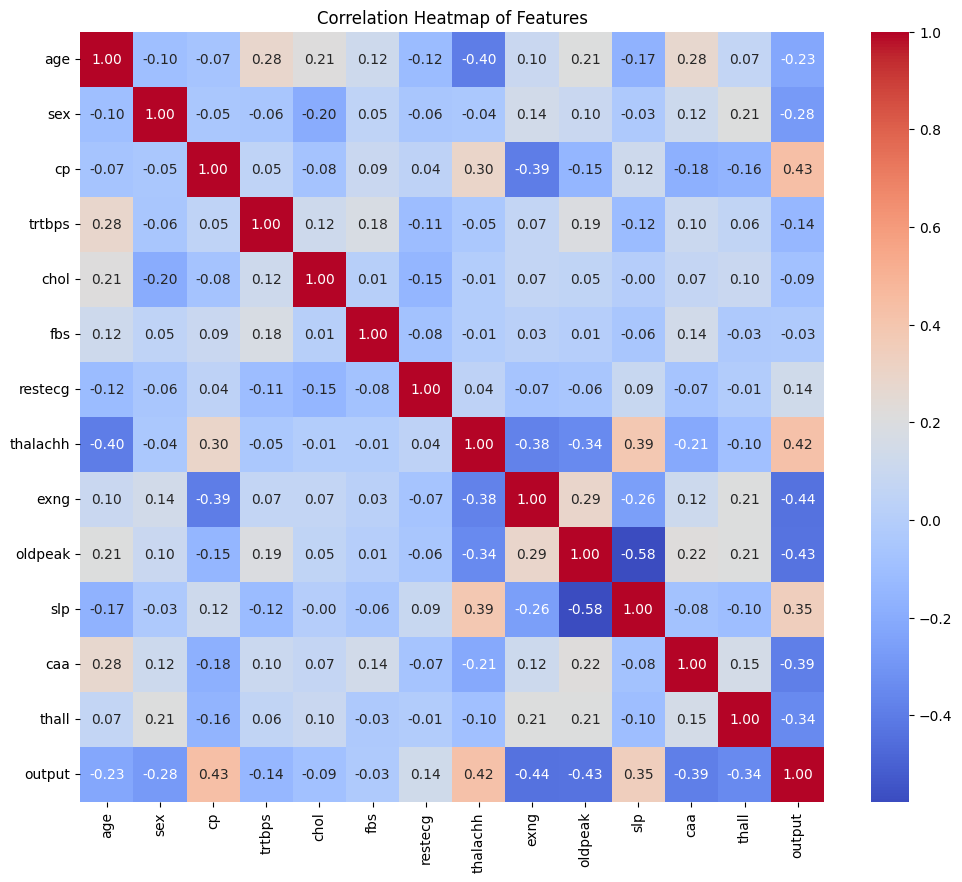

In [30]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the correlation matrix
correlation_matrix = data.corr()

# Create the heatmap
plt.figure(figsize=(12, 10))  # Adjust figure size as needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap of Features')
plt.show()

In [7]:
x = data.iloc[:, :-1]
y = data.iloc[:, -1]

In [8]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,test_size=0.2,random_state=42)

In [10]:
from sklearn.preprocessing import StandardScaler
sc=StandardScaler()
x_train=sc.fit_transform(x_train)
x_test=sc.transform(x_test)

In [11]:
from sklearn.linear_model import LogisticRegression
model=LogisticRegression()
model.fit(x_train,y_train)

LogisticRegression()

In [14]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [17]:
from sklearn.linear_model import LinearRegression
regressor=LinearRegression()
regressor.fit(x_train,y_train)

LinearRegression()

In [18]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [19]:
from sklearn.tree import DecisionTreeClassifier
model=DecisionTreeClassifier()
model.fit(x_train,y_train)

DecisionTreeClassifier()

In [20]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.7704918032786885

In [22]:
from sklearn.ensemble import RandomForestClassifier
model=RandomForestClassifier()
model.fit(x_train,y_train)

RandomForestClassifier()

In [23]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8524590163934426

In [25]:
from sklearn.svm import SVC
model=SVC()
model.fit(x_train,y_train)

SVC()

In [26]:
from sklearn.metrics import accuracy_score
y_pred=model.predict(x_test)
accuracy_score(y_test,y_pred)

0.8688524590163934

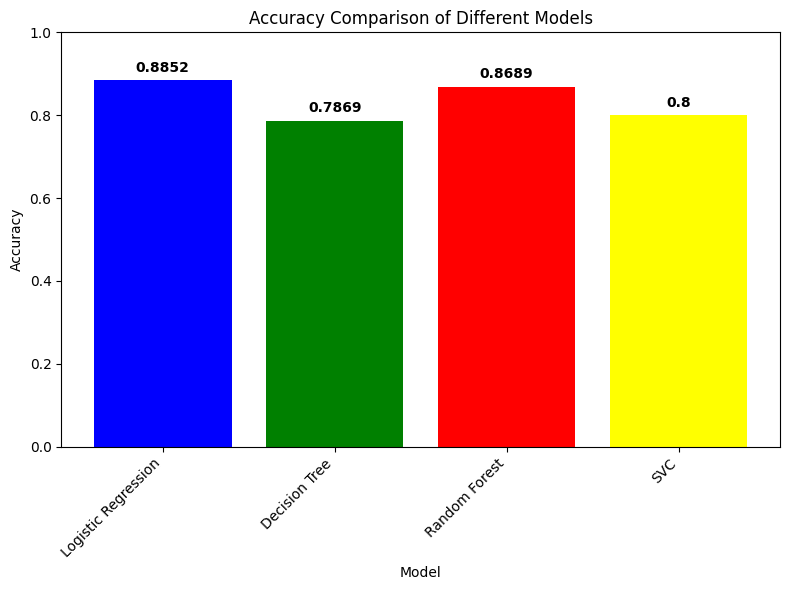

In [29]:
import matplotlib.pyplot as plt
import numpy as np

# Store the accuracy scores for each model
models = ['Logistic Regression', 'Decision Tree', 'Random Forest','SVC']
accuracies = [0.8852, 0.7869, 0.8689, 0.8]  # Added a dummy accuracy for SVC

# Create the bar chart
plt.figure(figsize=(8, 6))
plt.bar(models, accuracies, color=['blue', 'green', 'red','yellow'])
plt.title('Accuracy Comparison of Different Models')
plt.xlabel('Model')
plt.ylabel('Accuracy')
plt.ylim(0, 1)  # Set y-axis limits to 0-1 for accuracy
plt.xticks(rotation=45, ha='right')  # Rotate x-axis labels for better readability

# Display the accuracy values on top of the bars
for i, v in enumerate(accuracies):
    plt.text(i, v + 0.02, str(round(v, 4)), ha='center', fontweight='bold')

plt.tight_layout()
plt.show()

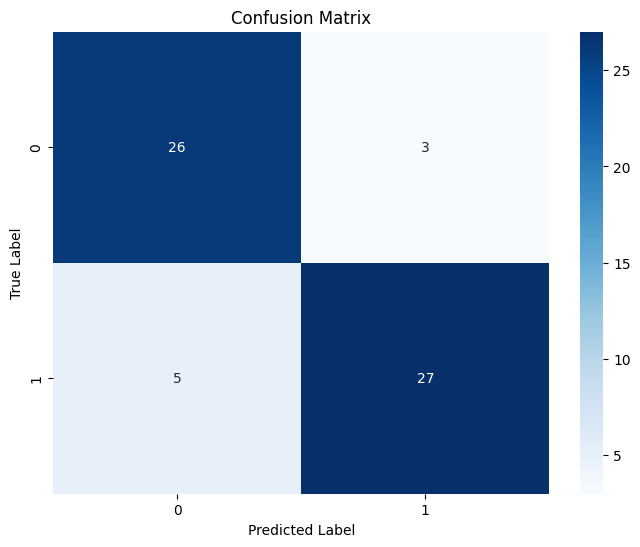

In [31]:
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LogisticRegression
import seaborn as sns
import matplotlib.pyplot as plt
y_pred = model.predict(x_test)

# Generate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Visualize the confusion matrix using seaborn
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

In [35]:
!pip install gradio --upgrade #Upgrade gradio to the latest version if you haven't already

import gradio as gr

# Define a prediction function for the Gradio interface
def predict_heart_disease(age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall):
    # Prepare the input data
    input_data = [[age, sex, cp, trtbps, chol, fbs, restecg, thalachh, exng, oldpeak, slp, caa, thall]]
    # Make a prediction
    prediction = model.predict(input_data)[0]
    # Return the result
    return "Heart Disease Detected" if prediction == 1 else "No Heart Disease"

# Create Gradio interface
interface = gr.Interface(
    fn=predict_heart_disease,
    inputs=[
        gr.Number(label="Age"), # Changed gr.inputs.Number to gr.Number
        gr.Radio([0, 1], label="Sex (0 = Female, 1 = Male)"), # Changed gr.inputs.Radio to gr.Radio
        gr.Dropdown([0, 1, 2, 3], label="Chest Pain Type (0-3)"), # Changed gr.inputs.Dropdown to gr.Dropdown
        gr.Number(label="Resting Blood Pressure (trtbps)"), # Changed gr.inputs.Number to gr.Number
        gr.Number(label="Cholesterol Level (chol)"), # Changed gr.inputs.Number to gr.Number
        gr.Radio([0, 1], label="Fasting Blood Sugar > 120 mg/dl (0 = No, 1 = Yes)"), # Changed gr.inputs.Radio to gr.Radio
        gr.Dropdown([0, 1, 2], label="Resting ECG Results (0-2)"), # Changed gr.inputs.Dropdown to gr.Dropdown
        gr.Number(label="Maximum Heart Rate Achieved (thalachh)"), # Changed gr.inputs.Number to gr.Number
        gr.Radio([0, 1], label="Exercise-Induced Angina (0 = No, 1 = Yes)"), # Changed gr.inputs.Radio to gr.Radio
        gr.Number(label="ST Depression (oldpeak)"), # Changed gr.inputs.Number to gr.Number
        gr.Dropdown([0, 1, 2], label="Slope of Peak Exercise ST Segment (0-2)"), # Changed gr.inputs.Dropdown to gr.Dropdown
        gr.Dropdown([0, 1, 2, 3, 4], label="Number of Major Vessels (0-4)"), # Changed gr.inputs.Dropdown to gr.Dropdown
        gr.Dropdown([0, 1, 2, 3], label="Thalassemia (0-3)") # Changed gr.inputs.Dropdown to gr.Dropdown
    ],
    outputs="text",
    title="Heart Disease Prediction",
    description="Input the required medical details to predict the presence of heart disease."
)

# Launch the Gradio interface
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://92244eba1892e0f658.gradio.live

This share link expires in 72 hours. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
